Run the cell below

In [1]:
import math
import matplotlib.pyplot as plt

Lets import numpy

numpy: NumPy is a fundamental library for numerical and mathematical operations in Python. It offers support for multi-dimensional arrays and matrices, making it crucial for scientific and mathematical computations. Numpy adds datatypes like arrays and features such as vectorization.








In [2]:
import numpy as np

We create input variable 'x_train' with two training examples representing Previous Score of the student.

Likewise, we create target variable 'y_train' with two values for our training examples representing the Performance Index of the student.


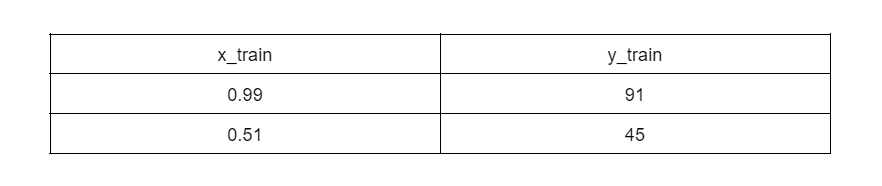

In [3]:
x_train = np.array([0.99, 0.51])
y_train = np.array([91.0, 45.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [0.99 0.51]
y_train = [91. 45.]


Extracting input dimensions can be done in two ways
1. using '.shape()' method of array

In [4]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


2. using 'len()' method in python

In [5]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


Run the cell below to visualize our data

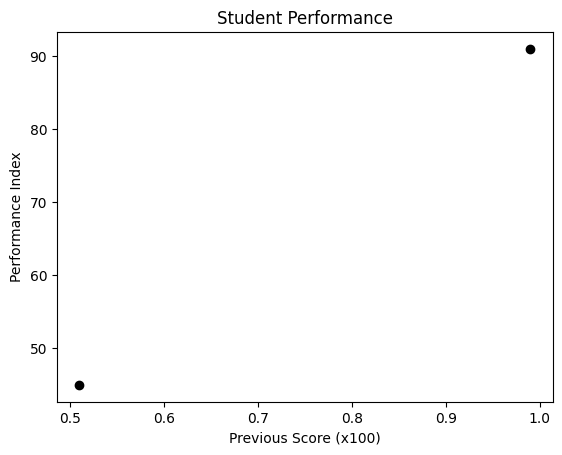

In [6]:
# Plot the data points
plt.scatter(x_train, y_train, marker='o', c='black')
# Set the title
plt.title("Student Performance")
# Set the y-axis label
plt.ylabel('Performance Index')
# Set the x-axis label
plt.xlabel('Previous Score (x100)')
plt.show()

Run the cell below to set ideal weight and bias values for prediction

In [7]:
w = 94.2231
b = -2.6217
print(f"w: {w}")
print(f"b: {b}")

w: 94.2231
b: -2.6217


This is your first task! You need to write the code to predict the output $f_{w,b}(x^{(i)})$ which is:

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$


In [8]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
      x (ndarray (m,)): input data, m examples
      w,b (scalar)    : model parameters
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)

    # write code here
    for i in range(m):
        f_wb[i] = w * x[i] + b
    # finish code

    return f_wb

Run the cell below to test your code

In [77]:
# Test cases
temp_x = np.array([1, 2, 3, 4])
temp_w = 2
temp_b = 1

# Calculate the expected output
expected_output = np.array([3, 5, 7, 9])

# Call the function with the input values
output = compute_model_output(temp_x, temp_w, temp_b)
# Check if the output matches the expected output
if np.array_equal(output, expected_output):
    print("Correct.")
else:
    print("Not correct.")

# We determine the desired outcome and design a test case with x, w, and b.
# The compute_model_output function is then called with these inputs, and the expected and actual outputs are compared.
# It will display "Output is correct" if they match and "Output is not correct" if they don't.

Correct.


Lets plot the line to see if it fits our output

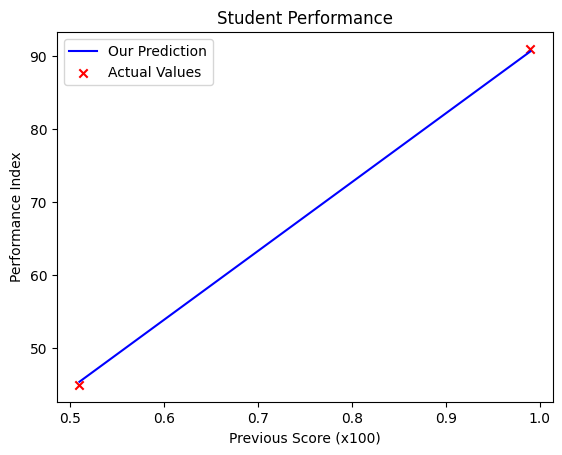

In [10]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Student Performance")
# Set the y-axis label
plt.ylabel('Performance Index')
# Set the x-axis label
plt.xlabel('Previous Score (x100)')
plt.legend()
plt.show()

Lets make a prediction using the function you wrote

In [11]:
x_i = 0.65
performance_prediction = w * x_i + b

print(f"{performance_prediction:.0f} marks in the next exam")

59 marks in the next exam


Cost is a measure how well our model is predicting the target price of the house.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{2}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  

- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   

- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  



In [12]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """

    m = x.shape[0]

    # write code here
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum
    # finish code

    return total_cost

Run the cell below to test your code

In [13]:
# Define example data and model parameters
temp_x = np.array([1, 2, 3, 4, 5])  # Input data
temp_y = np.array([2, 4, 6, 8, 10])  # Target values
temp_w = 2.0  # Model parameter (slope)
temp_b = 0.0  # Model parameter (intercept)

# Expected cost (for the provided data and parameters)
temp_expected_cost = 0.0

# Call the compute_cost function to calculate the cost
temp_calculated_cost = compute_cost(temp_x, temp_y, temp_w, temp_b)

# Check if the calculated cost matches the expected cost
if temp_calculated_cost == temp_expected_cost:
    print("Correct")
else:
    print("Not Correct")

Correct


Run the cell below to print the cost for our prediction on the data

In [14]:
print(compute_cost(x_train, y_train, w, b))

0.07571494028050227


The primary purpose of Gradient descent is to find the minimum of the function. This is done to converge to the optimal values of weights and bias, so that our predictions have minimum error, creating accurate results.

We define it as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}
$$

where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions.
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above
- `gradient_descent`, utilizing compute_gradient and compute_cost


<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [15]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): input data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    # write code here
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    # finish code

    return dj_dw, dj_db

Run the  cell below to test your code.

In [16]:
# Define example data and model parameters
temp_x = np.array([1, 2, 3, 4, 5])  # Input data
temp_y = np.array([2, 4, 6, 8, 10])  # Target values
temp_w = 2.0  # Model parameter (slope)
temp_b = 0.0  # Model parameter (intercept)

# Expected gradients (for the provided data and parameters)
expected_dj_dw = 0.0
expected_dj_db = 0.0

# Call the compute_gradient function to calculate the gradients
calculated_dj_dw, calculated_dj_db = compute_gradient(temp_x, temp_y, temp_w, temp_b)

# Check if the calculated gradients match the expected gradients
if calculated_dj_dw == expected_dj_dw and calculated_dj_db == expected_dj_db:
    print("Correct")
else:
    print("Not Correct")

Correct


Now lets implement gradient descent

In [17]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : input data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """

    # A list to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        # write code here
        dj_dw, dj_db = gradient_function(x, y, w , b)
        # finish code

        # Update Parameters using equation (3) above
        # write code here
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        # finish code

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

Run the cell below to run Gradient descent. We will set an optimal value for alpha (learning rate).

You should expect to get the following values:

w = 94.2231

b = -2.6217

In [18]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 1000
tmp_alpha = 0.1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.86e+03  dj_dw: -5.652e+01, dj_db: -6.800e+01   w:  5.652e+00, b: 6.80000e+00
Iteration  100: Cost 5.30e+01  dj_dw: -1.555e+00, dj_db:  1.210e+00   w:  5.323e+01, b: 2.92855e+01
Iteration  200: Cost 2.56e+01  dj_dw: -1.080e+00, dj_db:  8.408e-01   w:  6.624e+01, b: 1.91596e+01
Iteration  300: Cost 1.23e+01  dj_dw: -7.504e-01, dj_db:  5.841e-01   w:  7.527e+01, b: 1.21258e+01
Iteration  400: Cost 5.96e+00  dj_dw: -5.213e-01, dj_db:  4.057e-01   w:  8.155e+01, b: 7.23977e+00
Iteration  500: Cost 2.87e+00  dj_dw: -3.621e-01, dj_db:  2.818e-01   w:  8.591e+01, b: 3.84577e+00
Iteration  600: Cost 1.39e+00  dj_dw: -2.515e-01, dj_db:  1.958e-01   w:  8.894e+01, b: 1.48815e+00
Iteration  700: Cost 6.69e-01  dj_dw: -1.747e-01, dj_db:  1.360e-01   w:  9.105e+01, b:-1.49538e-01
Iteration  800: Cost 3.23e-01  dj_dw: -1.214e-01, dj_db:  9.446e-02   w:  9.251e+01, b:-1.28714e+00
Iteration  900: Cost 1.56e-01  dj_dw: -8.431e-02, dj_db:  6.562e-02   w:  9.352e+01, b:-2.07737e+00


Lets visualise the cost per iteration to see the behaviour of cost as gradient descent works. Ideally, cost should decrease every iteration.

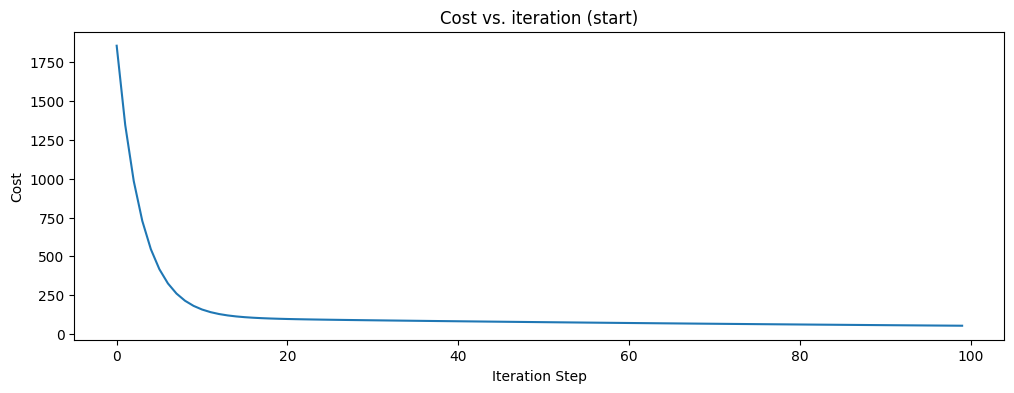

In [19]:
# Plot cost versus iteration
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.plot(J_hist[:100])
ax1.set_title("Cost vs. iteration (start)")
ax1.set_ylabel('Cost')
ax1.set_xlabel('Iteration Step')
plt.show()

Now, lets make a test prediction on a student whose previous score was 65. We will represent it as 0.65.

In [20]:
x_i = 0.65
performance_prediction = w_final * x_i + b_final

print(f"{performance_prediction:.0f} marks in the next exam")

59 marks in the next exam


Lets compute the cost for this prediction. After running the cell below, we see that the cost is extremely low, indicating optimal performance.

In [21]:
compute_cost(np.array([0.65]), np.array([64]), w_final, b_final)

14.454602512559577

Now, lets see the effect of a high learning rate on gradient descent. We will increase the value of alpha and keep the rest same.

In [22]:
tmp_alpha = 1.5
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 4.76e+03  dj_dw: -5.652e+01, dj_db: -6.800e+01   w:  8.478e+01, b: 1.02000e+02
Iteration  100: Cost 2.33e+31  dj_dw: -3.835e+15, dj_db: -4.927e+15   w:  3.331e+15, b: 4.27931e+15
Iteration  200: Cost 1.16e+59  dj_dw: -2.709e+29, dj_db: -3.480e+29   w:  2.353e+29, b: 3.02302e+29
Iteration  300: Cost 5.80e+86  dj_dw: -1.914e+43, dj_db: -2.459e+43   w:  1.662e+43, b: 2.13554e+43
Iteration  400: Cost 2.89e+114  dj_dw: -1.352e+57, dj_db: -1.737e+57   w:  1.174e+57, b: 1.50860e+57
Iteration  500: Cost 1.44e+142  dj_dw: -9.550e+70, dj_db: -1.227e+71   w:  8.295e+70, b: 1.06572e+71
Iteration  600: Cost 7.21e+169  dj_dw: -6.746e+84, dj_db: -8.668e+84   w:  5.859e+84, b: 7.52850e+84
Iteration  700: Cost 3.60e+197  dj_dw: -4.766e+98, dj_db: -6.123e+98   w:  4.139e+98, b: 5.31833e+98
Iteration  800: Cost 1.79e+225  dj_dw: -3.367e+112, dj_db: -4.325e+112   w:  2.924e+112, b: 3.75701e+112
Iteration  900: Cost 8.96e+252  dj_dw: -2.378e+126, dj_db: -3.056e+126   w:  2.066e+126, b:

Now, lets make a test prediction on the same student, but with the newly found values for our parameters with high learning rate.

In [23]:
x_i = 0.65
performance_prediction = w_final * x_i + b_final

print(f"{performance_prediction:.0f} marks in the next exam")

-205248875385940983602273101063874260244882848810901567532699763064621106662420856921894972109250692386402029466496535395010701674671895478272 marks in the next exam


Lets compute the cost for this prediction. After running the cell below, we see that the cost is much higher, indicating poor performance by the model.

In [24]:
compute_cost(np.array([0.65]), np.array([64]), w_final, b_final)

2.1063550423596764e+280

# You have implemented single linear regression in base python.
Now, lets use pre-built libraries to speed up this process. These libraries are used in the forefront of AI/ML. Lets import them.



pandas: Pandas is a powerful data manipulation library in Python. It provides data structures and functions for efficiently working with structured data, such as data tables. You can easily load, analyze, and manipulate data using data frames with Pandas.


StandardScaler (from scikit-learn): StandardScaler is a class from the scikit-learn library used for scaling and standardizing features in machine learning. It helps to transform your data into a standard format, which can improve the performance of certain machine learning algorithms.


train_test_split (from scikit-learn): This function from scikit-learn is used for splitting your dataset into training and testing subsets. It's crucial for evaluating the performance of machine learning models.


LinearRegression (from scikit-learn): LinearRegression is a class in scikit-learn for implementing linear regression models. It's commonly used for modeling linear relationships between variables in predictive analytics and regression tasks.


mean_squared_error (from scikit-learn): Mean Squared Error (MSE) is a common metric for measuring the accuracy of regression models. This function in scikit-learn calculates the MSE between the predicted and actual values, helping you assess the model's performance.


accuracy_score (from scikit-learn): Accuracy Score is a metric for evaluating the performance of classification models. It calculates the accuracy of the model's predictions by comparing them to the actual labels.

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

Lets read the csv file and store it into a dataframe. We will use the path of the Single linear regression file to do this.

In [26]:
df = pd.read_csv('/content/Student performance single linear regression.csv')

Lets print the dataframe

In [27]:
df

,Previous Scores,Performance Index
0,99,91
1,82,65
2,51,45
3,52,36
4,75,66
...,...,...
9995,49,23
9996,64,58
9997,83,74
9998,97,95


The method '.describe()' describes our data giving us useful information such as the mean.

In [28]:
df.describe()

,Previous Scores,Performance Index
count,10000.000000,10000.000000
mean,69.445700,55.224800
std,17.343152,19.212558
min,40.000000,10.000000
25%,54.000000,40.000000
50%,69.000000,55.000000
75%,85.000000,71.000000
max,99.000000,100.000000


Now, lets set our input data as 'X'.
We will set X as the Previous Scores column.

Likewise, lets set our target data as 'y'.
We will set y as the Performance Index column.

In [29]:
X = df.drop(['Performance Index'], axis = 1)
y = df['Performance Index']

Lets print X

In [30]:
X

,Previous Scores
0,99
1,82
2,51
3,52
4,75
...,...
9995,49
9996,64
9997,83
9998,97


Lets print y

In [31]:
y

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: Performance Index, Length: 10000, dtype: int64

Now, we will perform normalization on our input data to enhance our models performance. This is done by following the steps

1. Store columns of X in a variable 'columns' by using the '.columns' method. We do this because using standard scaler converts our dataframe into a numpy array and in order to convert it back to a dataframe, we require the column names.

In [32]:
columns = X.columns

Lets print the columns variable

In [33]:
columns

Index(['Previous Scores'], dtype='object')

2. Lets create an instance of StandardScaler class to use it. Assign this to the variable 'scaler'.

In [34]:
scaler = StandardScaler()

3. Now, we will use the 'fit_transform()' method of standard scaler in order to do 2 things:


  *   Find the standard deviation for our input data (fit)
  *   Normalize our input data (transform)



In [35]:
X = scaler.fit_transform(X)

4. Lets convert our normalized data to a dataframe again

In [36]:
X = pd.DataFrame(X, columns = columns)

Lets use the '.describe()' methood to see the change in our input data.

In [37]:
X.describe()

,Previous Scores
count,1.000000e+04
mean,-1.296740e-16
std,1.000050e+00
min,-1.697914e+00
25%,-8.906381e-01
50%,-2.570019e-02
75%,8.969003e-01
max,1.704176e+00


Now, we will use the 'train_test_split()' method in order to split our data into training and test data. We will store this in 4 variables: train_X, test_X, train_y, test_y. We will split our data as 80% training data, 20% testing data.

In [38]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, shuffle = False, stratify = None)

Now, lets create an instance of the LinearRegression() class to use the model. Assign this to the variable 'lr'.

In [39]:
lr = LinearRegression()

Now, we will train the model on our training data. We can do this by using the 'fit()' method.

In [40]:
lr.fit(train_X, train_y)

LinearRegression()

Now that our model is trained, we can use it to make predictions using the '.predict()' method. Lets make predictions on the training data and store it in the variable 'train_predictions'

In [41]:
train_predictions = lr.predict(train_X)

Lets make predictions on the testing data and store it in the variable 'test_predictions'

In [42]:
test_predictions = lr.predict(test_X)

Now, we will use the 'mean_squared_error()' method to find the mean squared error for our predictions on the **training **data. We will do this by comparing with the target values of training data.

In [43]:
train_mse = mean_squared_error(train_y, train_predictions)

Print the training mean squared error

In [44]:
train_mse

59.77420165717037

Now, we will use the same method to find the mean squared error for our predictions on the **testing** data. We will do this by comparing with the target values of testing data.

In [45]:
test_mse = mean_squared_error(test_y, test_predictions)

Print the testing mean squared error

In [46]:
test_mse

60.66661485084574

Great work! Lets visualise our predictions. Run the cells below.

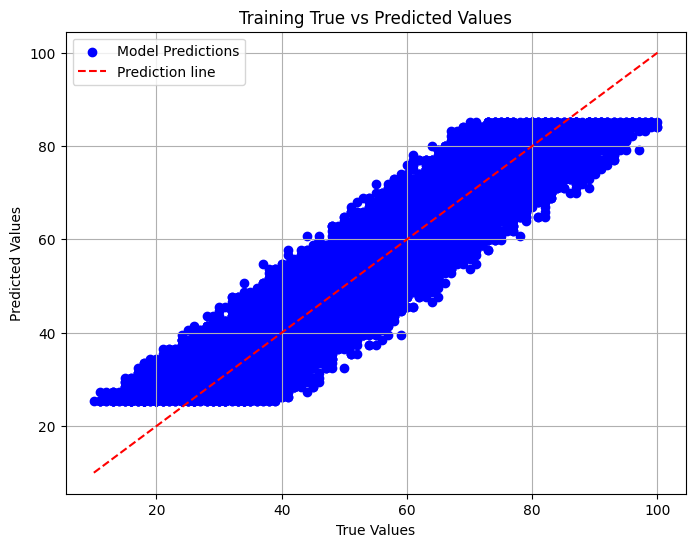

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(train_y, train_predictions, c='blue', label='Model Predictions')
plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], linestyle='--', color='red', label='Prediction line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Training True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

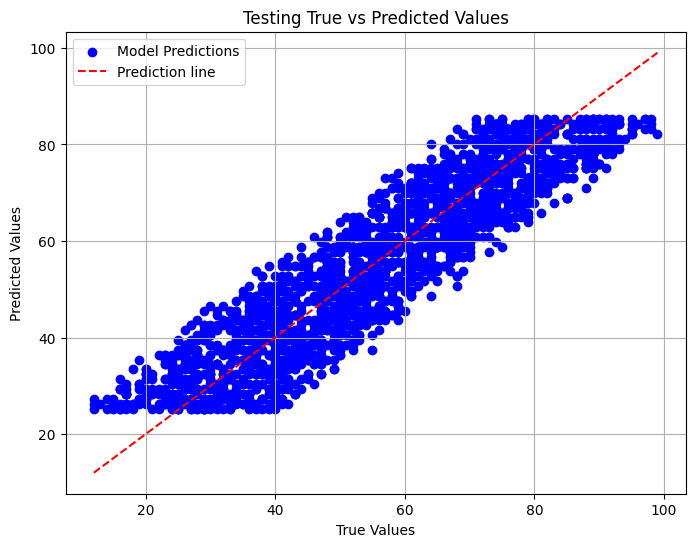

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(test_y, test_predictions, c='blue', label='Model Predictions')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], linestyle='--', color='red', label='Prediction line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Testing True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

As we see, we can generalize and make predictions fairly well.

Now, lets use the '.predict()' method of LinearRegression to make a prediction on our first training example (at index 0). We can access a training example in a dataframe using '.iloc[]'

In [49]:
lr.predict(train_X.iloc[[0]])

array([85.16748616])

Lets see what the true target value of our first training example.

In [50]:
train_y.iloc[[0]]

0    91
Name: Performance Index, dtype: int64

As we can see, the performance is still not as great as our cost is pretty high and the actual target value and predicted target value are really different.

# Now, we will look at implementing Multiple Linear Regression, which increases complexity but creates more accurate predictions.



Lets read the csv file and store it into a dataframe. We will use the path of the multiple linear regression file to do this.

In [51]:
df = pd.read_csv('/content/Student_Performance multiple linear regression.csv')

Run the cell below to set new input and target values. Notice that our input data is now a 2-dimensional array, or a matrix.

In [52]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Run the cell below to visualise our data

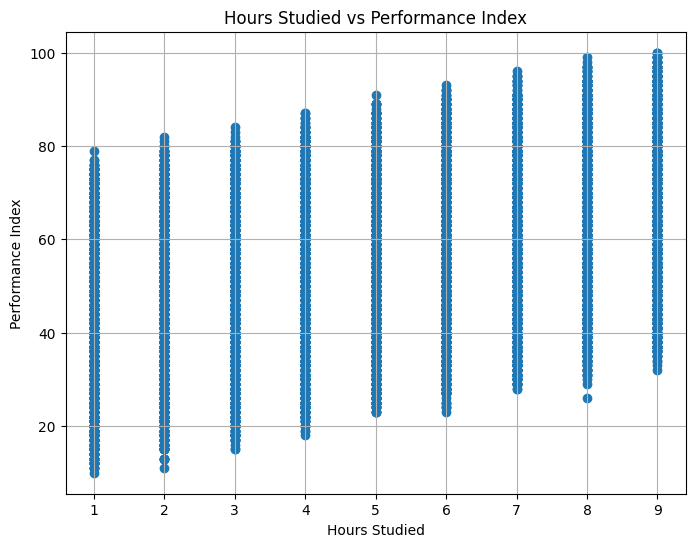

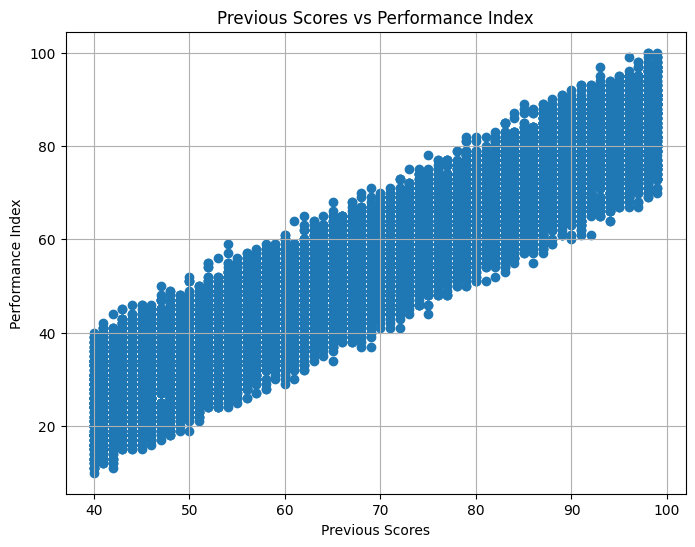

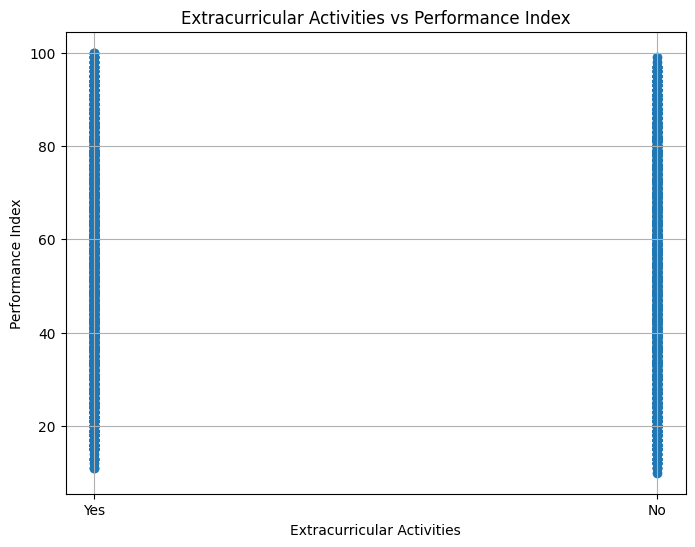

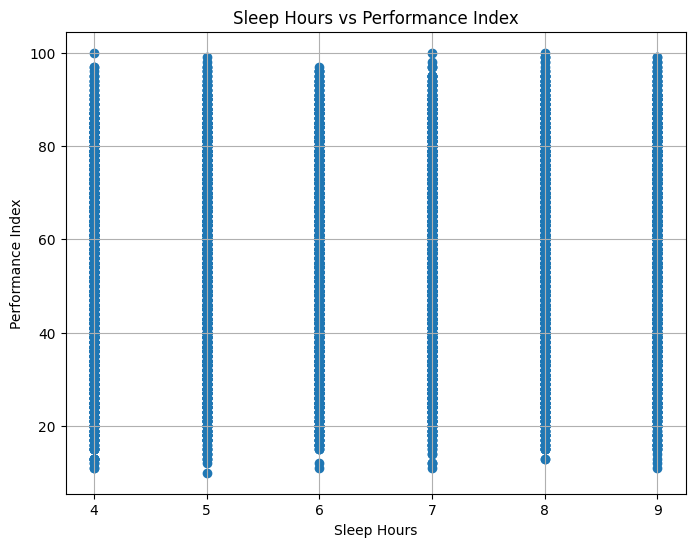

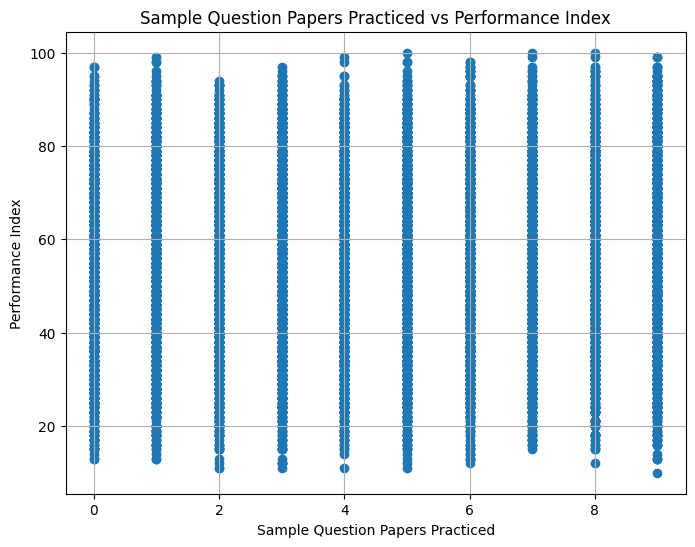

In [53]:
columns_to_plot = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df['Performance Index'])
    plt.xlabel(column)
    plt.ylabel('Performance Index')
    plt.title(f'{column} vs Performance Index')
    plt.grid(True)
    plt.show()
plt.show()

Lets understand our data a little more by using the '.describe()' method

In [54]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Now, lets set our input data as 'X'.
We will set X as every column except the performance index column. We will do this by dropping only the performance index column.

Lets set our target data as 'y'.
We will set y as the Performance Index column.

In [55]:
X = df.drop(['Performance Index'], axis = 1)
y = df['Performance Index']

Visualise the data by printing both X and y

In [56]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [57]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

Now, we see that the extracurricular activities column isn't numerically represented. In order to do so, we will implement one-hot encoding, converting yes to 1 and no to 0 so that our model can actually understand the data.

We will make use of the '.replace()' method

In [58]:
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

Lets visualise the changes

In [59]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


Now, we will perform standard scaling on our input dataset X. We will follow the same procedure as single linear regression.

1. Store columns of X in a variable 'columns' by using the '.columns' method. We do this because using standard scaler converts our dataframe into a numpy array and in order to convert it back to a dataframe, we require the column names.



In [60]:
columns = X.columns

Lets print the columns

In [61]:
columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

2. If we have already created an instance of StandardScaler, we can simply go ahead and use it.

3. Now, we will use the 'fit_transform()' method of standard scaler in order to do 2 things:
  -  Find the standard deviation for our input data (fit)
  -   Normalize our input data (transform)

In [62]:
X = scaler.fit_transform(X)

4. Lets convert our normalized data to a dataframe again

In [63]:
X = pd.DataFrame(X, columns = columns)

Lets print X to see the normalized data

In [64]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1.010455,1.456205,-1.249754
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982
2,1.161410,-1.063626,1.010455,0.276805,-0.900982
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982
4,0.775188,0.320275,-0.989654,0.866505,0.145333
...,...,...,...,...,...
9995,-1.542149,-1.178951,1.010455,-1.492294,-0.900982
9996,0.775188,-0.314013,1.010455,0.866505,0.145333
9997,0.388965,0.781575,1.010455,0.866505,0.145333
9998,1.547633,1.588851,1.010455,0.276805,-1.598526


Now, we will use the 'train_test_split()' method in order to split our data into training and test data. We will store this in 4 variables: train_X, test_X, train_y, test_y. We will split our data as 80% training data, 20% testing data.

In [65]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2)

Since we have already created an instance of linear regression, we need not create it again. We can simply reuse it and train it again using the fit function on our new trainig data

In [66]:
lr.fit(train_X, train_y)

LinearRegression()

Lets make predictions on the training data and store it in the variable 'train_predictions'

In [67]:
train_predictions = lr.predict(train_X)

Lets make predictions on the testing data and store it in the variable 'test_predictions'

In [68]:
test_predictions = lr.predict(test_X)

Now, we will use the 'mean_squared_error()' method to find the mean squared error for our predictions on the **training** data. We will do this by comparing with the target values of training data.

In [69]:
train_mse = mean_squared_error(train_y, train_predictions)

Print the training mse

In [70]:
train_mse

4.145036219938051

Now, we will use the same method to find the mean squared error for our predictions on the **testing** data. We will do this by comparing with the target values of testing data.

In [71]:
test_mse = mean_squared_error(test_y, test_predictions)

Print the testing mse

In [72]:
test_mse

4.178307814582221

Great work! Lets visualise our predictions. Run the cells below.

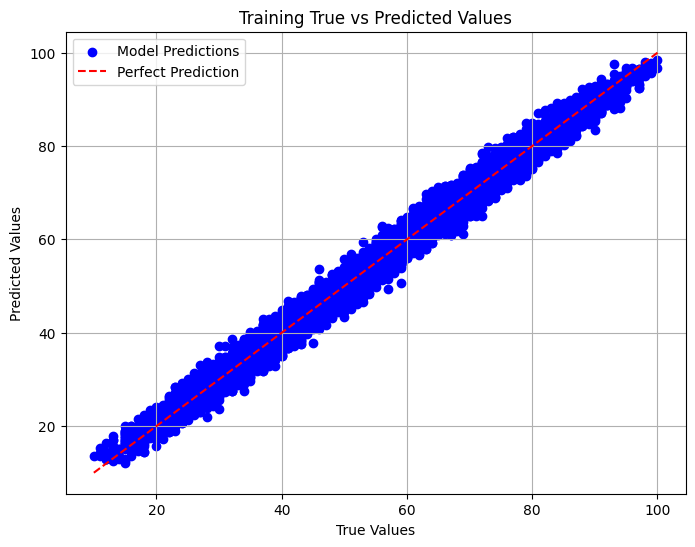

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(train_y, train_predictions, c='blue', label='Model Predictions')
plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Training True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

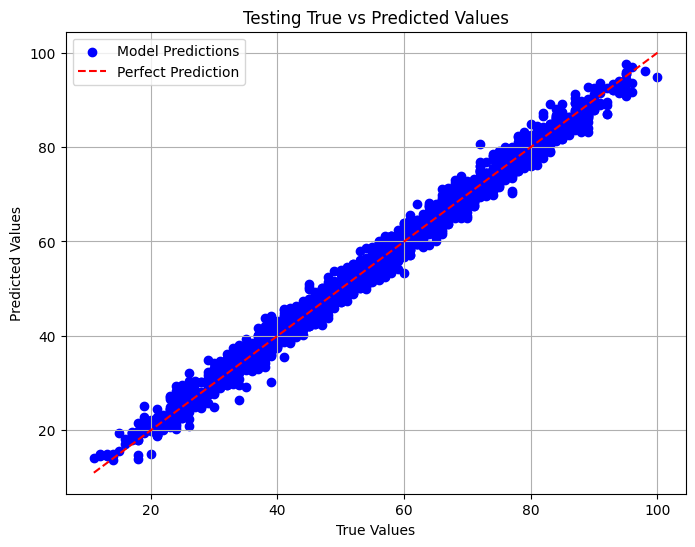

In [74]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_y, test_predictions, c='blue', label='Model Predictions')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Testing True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Now, lets use the '.predict()' method of LinearRegression to make a prediction on our first training example (at index 0). We can access a training example in a dataframe using '.iloc[]'

In [75]:
lr.predict(train_X.iloc[[0]])

array([47.58876149])

Lets see what the true target value of our first training example.

In [76]:
train_y.iloc[[0]]

2587    49.0
Name: Performance Index, dtype: float64

# Congratulations on completing the workshop! You have successfully implemented Multiple linear regression.
As we can see, multiple linear regression provides much more accurate predictions and better performance